# Importeer data


In [35]:
import kagglehub
import pandas as pd
import sklearn
import numpy as np 
path = kagglehub.dataset_download("arshid/iris-flower-dataset")
db = pd.read_csv(path + "/Iris.csv")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\joema\.cache\kagglehub\datasets\arshid\iris-flower-dataset\versions\1


In [36]:

db

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Decision Tree

In [37]:
from sklearn.model_selection import train_test_split

# One-hot encode the 'species' column
db_encoded = pd.get_dummies(db, columns=['species'])

# Prepare features and labels
X_df = db_encoded.drop(columns=['species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica'])
y_df = db_encoded[['species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica']]

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

list(X_df.columns)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# MAX DEPTH

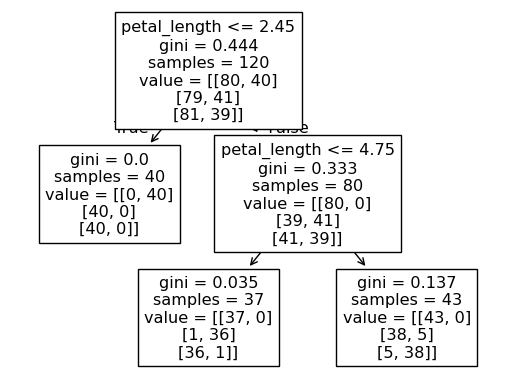

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

dtree = DecisionTreeClassifier(max_depth=2)
dtree = dtree.fit(X_train, y_train)
tree.plot_tree(dtree, feature_names=X_df.columns)
plt.show()

In [39]:
# Create a DataFrame for predicted labels with appropriate column names
predicted_df = pd.DataFrame(dtree.predict(X_test), columns=y_test.columns)
predicted_df = predicted_df.add_prefix('Predicted_')

# Concatenate true and predicted labels for comparison
model_results_frame = pd.concat([y_test.reset_index(drop=True), predicted_df.reset_index(drop=True)], axis=1)
model_results_frame

,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica,Predicted_species_Iris-setosa,Predicted_species_Iris-versicolor,Predicted_species_Iris-virginica
0,False,True,False,False,True,False
1,True,False,False,True,False,False
2,False,False,True,False,False,True
3,False,True,False,False,True,False
4,False,True,False,False,False,True
5,True,False,False,True,False,False
6,False,True,False,False,True,False
7,False,False,True,False,False,True
8,False,True,False,False,True,False
9,False,True,False,False,True,False


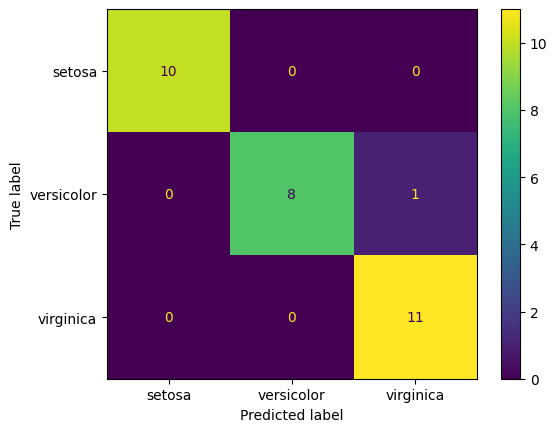

In [40]:
confusion_matrix = metrics.confusion_matrix(y_test_labels, y_pred_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=class_names)

cm_display.plot()
plt.show()

In [41]:
best_accuracy = 0
best_depth = 0

max_depths = range(1, 40)
for depth in max_depths:
    dtree = DecisionTreeClassifier(max_depth=depth)
    dtree = dtree.fit(X_train, y_train)
    
    y_pred = dtree.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    print(f"Max depth: {depth}, Accuracy: {accuracy:.4f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

print(f"\n🎯 Highest Accuracy: {best_accuracy:.4f} at Max Depth: {best_depth}")

Max depth: 1, Accuracy: 0.6333
Max depth: 2, Accuracy: 0.9667
Max depth: 3, Accuracy: 0.9667
Max depth: 4, Accuracy: 1.0000
Max depth: 5, Accuracy: 1.0000
Max depth: 6, Accuracy: 1.0000
Max depth: 7, Accuracy: 1.0000
Max depth: 8, Accuracy: 1.0000
Max depth: 9, Accuracy: 1.0000
Max depth: 10, Accuracy: 1.0000
Max depth: 11, Accuracy: 1.0000
Max depth: 12, Accuracy: 1.0000
Max depth: 13, Accuracy: 1.0000
Max depth: 14, Accuracy: 1.0000
Max depth: 15, Accuracy: 1.0000
Max depth: 16, Accuracy: 1.0000
Max depth: 17, Accuracy: 1.0000
Max depth: 18, Accuracy: 1.0000
Max depth: 19, Accuracy: 1.0000
Max depth: 20, Accuracy: 1.0000
Max depth: 21, Accuracy: 1.0000
Max depth: 22, Accuracy: 1.0000
Max depth: 23, Accuracy: 1.0000
Max depth: 24, Accuracy: 1.0000
Max depth: 25, Accuracy: 1.0000
Max depth: 26, Accuracy: 1.0000
Max depth: 27, Accuracy: 1.0000
Max depth: 28, Accuracy: 1.0000
Max depth: 29, Accuracy: 1.0000
Max depth: 30, Accuracy: 1.0000
Max depth: 31, Accuracy: 1.0000
Max depth: 32, Ac

In [42]:
metrics.accuracy_score(y_test_labels, y_pred_labels)

0.9666666666666667